In [86]:
import sys
import matplotlib
matplotlib.use('Agg')

import pandas
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
df = pandas.read_csv("./hr_train_1_fixed.csv")

Lägg till kolumnen gender i er data och fyll den med slumpmässiga värden

In [95]:
random_values = np.random.randint(0, 3, 1014)  # Generates random integers between 0 and 2 (inclusive)
df['gender'] = random_values
print(df.head())

   level  lang  tweets  phd  ignore  gender
0      3     1       0    0       1       0
1      3     1       0    1       1       0
2      2     2       0    0       1       0
3      1     2       0    0       1       0
4      1     3       1    0       0       1


Code function to convert dataframe ignore from string (true or false ) to (0 or  1)

In [142]:
features = ['level', 'lang', 'tweets', 'phd','gender']

X = df[features]
y = df['ignore']

dtree = DecisionTreeClassifier()

dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)
total = tree.plot_tree(dtree, feature_names=features)


In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(dtree, feature_names=features, filled=True, class_names=["0", "1"])
plt.savefig('decision_tree_gender.png')

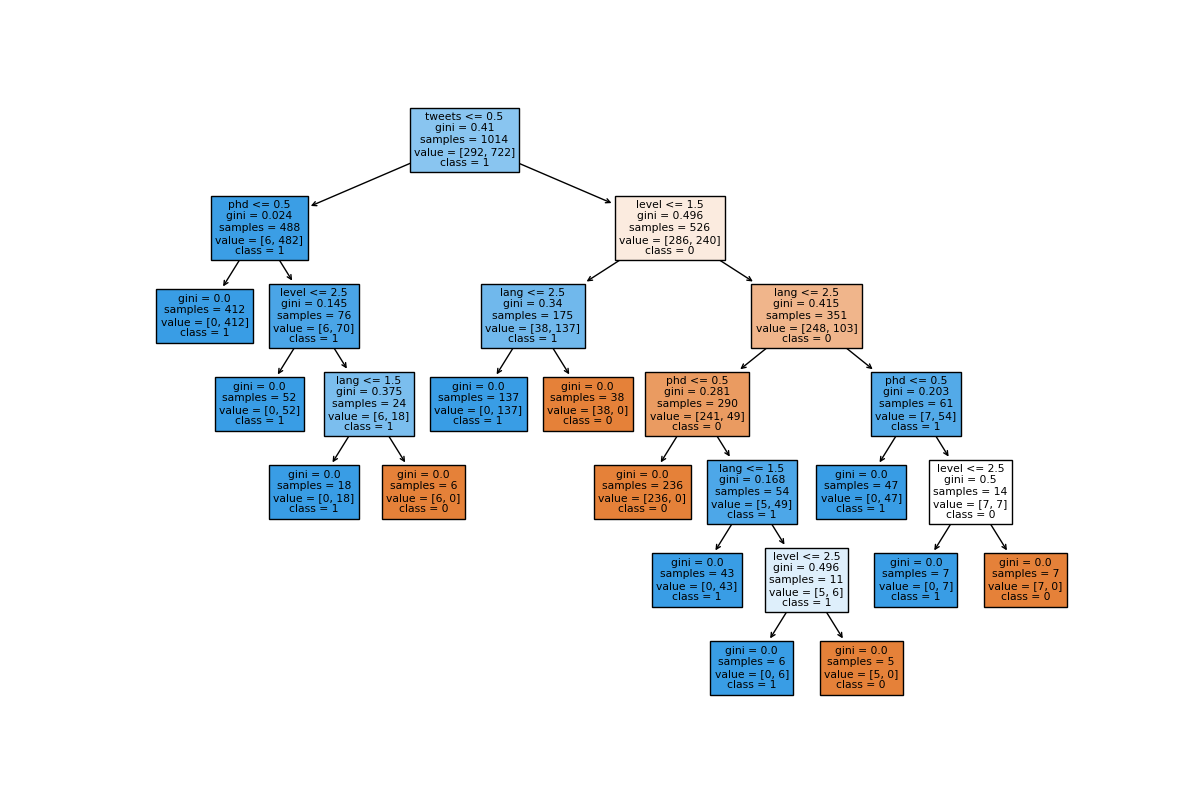

In [99]:
from IPython.display import Image, display
image_path = './decision_tree_gender.png'
display(Image(filename=image_path))

Bevisa att två tredjedelar av kön(gender) 2 kommer bli flaggade med ‘ignore’:True i ditt test.

In [136]:
gender_2_subset = df[df['gender'] == 2]
ignore_true_count = (gender_2_subset['ignore'] == True).sum()

total_count = len(gender_2_subset)
ignore_true_fraction = ignore_true_count / total_count
expected_fraction = 2 / 3

if ignore_true_fraction == expected_fraction:
      print("The proportion 'ignore': True is two-thirds of the gender (gender) 2.")
else:
      print("Proportion 'ignore': True is not two thirds of gender 2.")

Proportion 'ignore': True is not two thirds of gender 2.


Kan du förklara eller motförklara detta med hjälp av data utforskning och motivera ditt svar mot HR avdelningen

In [144]:
from collections import Counter

# Hämta indexen för de använda funktionerna vid beslutspunkterna
decision_features = dtree.tree_.feature

feature_importances  = dtree.feature_importances_
# Räkna antalet gånger varje beslutspunkt används
decision_counts = Counter(decision_features)

# Hitta de mest förekommande beslutspunkterna
most_common_decisions = decision_counts.most_common()
print(most_common_decisions[feature_index])

print("Mest förekommande beslutspunkter:")
for feature_index, count in most_common_decisions:
    feature_name = features[feature_index]  # Omvandla index till feature-namn om det behövs
    print(f"Feature: {feature_name}, Antal gånger: {count}")


(1, 4)
Mest förekommande beslutspunkter:
Feature: phd, Antal gånger: 13
Feature: level, Antal gånger: 4
Feature: lang, Antal gånger: 4
Feature: phd, Antal gånger: 3
Feature: tweets, Antal gånger: 1


Tips: Prova dela upp din data i test/train (20%/80%)

In [135]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['ignore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
plt.figure(figsize=(12, 8))  # Ställ in figurens storlek
plot_tree(dtree, feature_names=features, filled=True, class_names=["0", "1"])
plt.savefig('decision_tree_gender20.png')

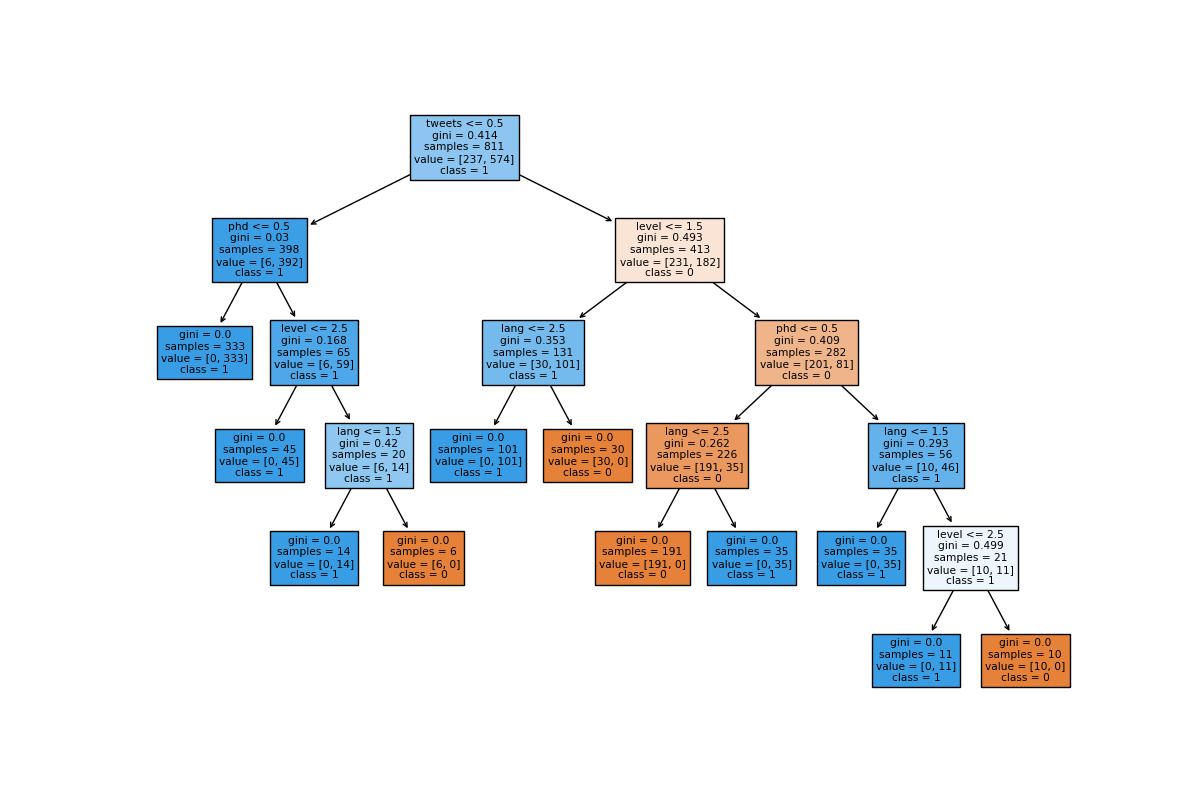

In [126]:
image_path = './decision_tree_gender20.png'
display(Image(filename=image_path))